In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes = datasets.load_diabetes()

diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [4]:
def linear_regression(X_train, y_train, X_test):
    X = np.concatenate((np.ones(len(X_train)).reshape(len(X_train),1), X_train), axis=1)
    regr_coef = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_train))
    y_pred = [regr_coef[0] + sum([regr_coef[j] * X_test[i, j-1] for j in range(1,len(regr_coef))]) for i in range(len(X_test))]
    return y_pred

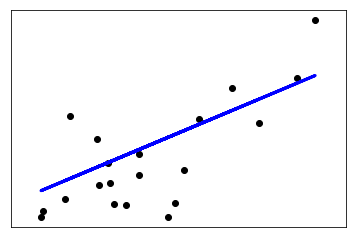

In [5]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
y_pred = linear_regression(diabetes_X_train, diabetes_y_train, diabetes_X_test)
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Порівняння із sklearn

In [6]:
regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


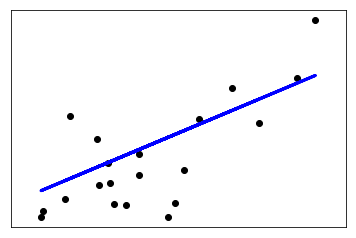

In [7]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()